# MOBAPP STUDIO PROJECT
## Research of the Google Play Store
> The goal is to analyze the market
> 1. Size of the market (total apps,installs,downloads)
> 2. Size of the market per category (total apps,installs,downloads with percentages)
> 3. Ratios of installs per apps per category
> 4. Istalls per app in each category (top 5 per category)

## Import the libraries needed for research
> numpy is for linear algebra <br>
> pandas is for data processing,I/O <br>
> matplotlib.pyplot is for plotting <br>
> collections for frequency tables

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import collections

# Data at a glance

In [21]:
df = pd.read_csv('googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Clean the data

## Format the columns first
> Replace space with underscore from column names <br>

In [22]:
df.columns = df.columns.str.replace(' ', '_')

## Unique values analysis
> Look at unique values to find if some data is wrongly placed

In [23]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('\n'*3)

App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']




Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']




Rating
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]




Reviews
['159' '967' '87510' ... '603' '1195' '398

## Shift the data
> It is clear that some data is wrongly placed during the analysis of unique values.<br>
> In category column '1.9' is clearly wrong.<br>
> Need to locate the row<br>

In [24]:
df_row_index = df.index[df['Category']=='1.9'].tolist()
print(df_row_index)

[10472]


> Shift the row to the right<br>
> Correct the name of App<br>
> Correct the Category of App<br>

In [25]:
df_shifted = df.shift(1,axis = 1)
df.loc[10472] = df_shifted.loc[10472]
df['App'][10472] = 'Life Made WI-Fi Touchscreen Photo Frame'
df['Category'][10472] = 'LIFESTYLE'
df.loc[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


## Handle duplicates 
> Now need to drop duplicates of Apps, compare the numbers<br>
> 10841 Apps before drop<br>
> 9660 Apps after drop<br>

In [26]:
df.info() #with duplicates
print('\n\n\n')
df.drop_duplicates(subset='App',keep='first',inplace = True)
df.info() #without diplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10841 non-null  object
 2   Rating          9367 non-null   object
 3   Reviews         10841 non-null  object
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10840 non-null  object
 7   Price           10841 non-null  object
 8   Content_Rating  10841 non-null  object
 9   Genres          10840 non-null  object
 10  Last_Updated    10841 non-null  object
 11  Current_Ver     10833 non-null  object
 12  Android_Ver     10839 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB




<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          -------------

## Clean data format in Installs column
> For our analysis we focus on Install and Price categories<br>
> Installs need to be in int64 format without any symbols<br>
> Get rid of , and + <br>
> Convert to numeric values

In [27]:
df['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             889
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [28]:
df['Installs'] = df["Installs"].apply(lambda x: x.replace('+',''))
df['Installs'] = df["Installs"].apply(lambda x: x.replace(',',''))
df['Installs']=pd.to_numeric(df['Installs'])
df['Installs'].value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           889
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

## Clean data format in Price column
> For our analysis we focus on Install and Price categories<br>
> Price need to be in int64 format without any symbols<br>
> Get rid of $ <br>
> Convert to numeric values

In [29]:
df['Price'].value_counts()

0          8904
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$1.61         1
$33.99        1
$3.90         1
$394.99       1
$2.95         1
Name: Price, Length: 92, dtype: int64

In [30]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$',''))
df['Price']=pd.to_numeric(df['Price'])
df['Price'].value_counts()
# df['Price'].isnull().any()

0.00     8904
0.99      145
2.99      124
1.99       73
4.99       70
         ... 
1.59        1
46.99       1
19.90       1
28.99       1
1.04        1
Name: Price, Length: 92, dtype: int64

# VISUALISE DATA

## TOTAL DATA
> FOCUSING ON NUMBER OF APPS,DOWNLOADS,PRICES FOR THE WHOLE MARKET <br>
> Get the categories list for all plots below to be used

In [31]:
categories_list = df['Category'].unique().tolist()
categories_list

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [32]:
total_apps = len(df['App'].index)
total_installs = df['Installs'].sum()
df['Price*Installs'] = df['Price']*df['Installs']
total_money_spent = df['Price*Installs'].sum()

print('TOTAL NUMBER OF APPS IS',total_apps)
print('TOTAL NUMBER OF DOWNLOADS IS',total_installs)
print('TOTAL PRICE FOR ALL APPS',total_money_spent,'$')

TOTAL NUMBER OF APPS IS 9660
TOTAL NUMBER OF DOWNLOADS IS 75122938527
TOTAL PRICE FOR ALL APPS 291148457.79 $


## TOTAL DATA SUMMARY
> TOTAL NUMBER OF APPS IS <b> 9660 </b><br>
> TOTAL NUMBER OF DOWNLOADS IS <b>75 122 938 527 </b><br>
> TOTAL PRICE FOR ALL APPS IS <b>291 148 457.79 $</b>
<br>
<br>
> The total data will be used in ratios/percentages like
> - Apps per category
> - Installs per category
> - Money per category

In [33]:
def keys_values_lists_descending(categories_list,values_list):
    pairs_list = zip(categories_list,values_list)
    total_dict = dict(pairs_list)
    freq_list = collections.Counter(total_dict)
    top_dict = dict(freq_list.most_common())
    keys = list(top_dict.keys())
    values = list(top_dict.values())
    keys.reverse()
    values.reverse()
#     print(keys)
#     print(values)
    return keys,values

> The function above is used to get categories and values respectively <br>
> Sort their values in descending order <br> 
> Return categories and values<br>
> The output will be used in plotting horizontal bar charts<br>

## TOTAL APPS PER CATEGORY

<function matplotlib.pyplot.show(close=None, block=None)>

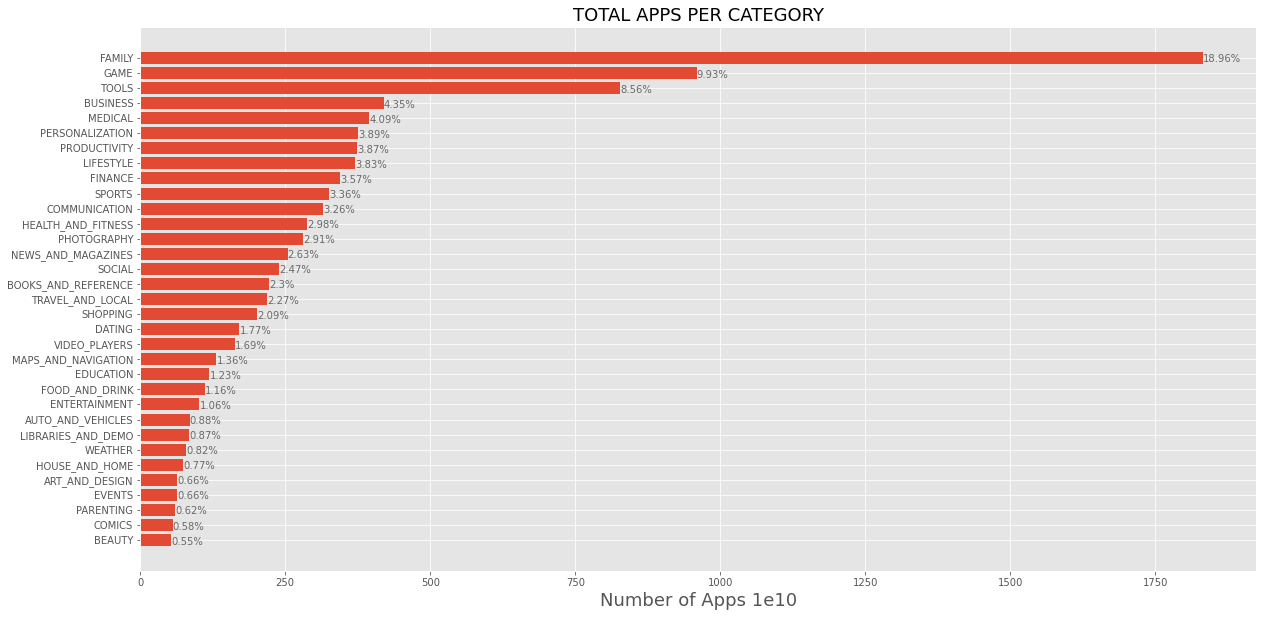

In [34]:
app_number_list = []

for category in categories_list:
    df_temp = df[(df['Category'] == category)]
    app_number_list.append(len(df_temp['App'].index))

# print(categories_list)
# print(app_number_list)
keys,values = keys_values_lists_descending(categories_list,app_number_list)
# print(keys)
# print(values)

fig,ax = plt.subplots(figsize=(20,10))
ax.set_title("TOTAL APPS PER CATEGORY", fontsize=18)
ax.set_xlabel("Number of Apps 1e10", fontsize=18);
ax.barh(keys,values)

# set individual bar lables using above list
index = 0
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.1, str(round((values[index]/total_apps)*100,2))+'%', fontsize=10,color='dimgrey')
    index = index + 1

plt.show


> It is clear from the bar chart that FAMILY,GAME and TOOLS Apps are almost <b>40%</b> of the whole market, which means <i>high level of competition</i>

## TOTAL INSTALLS PER CATEGORY

<function matplotlib.pyplot.show(close=None, block=None)>

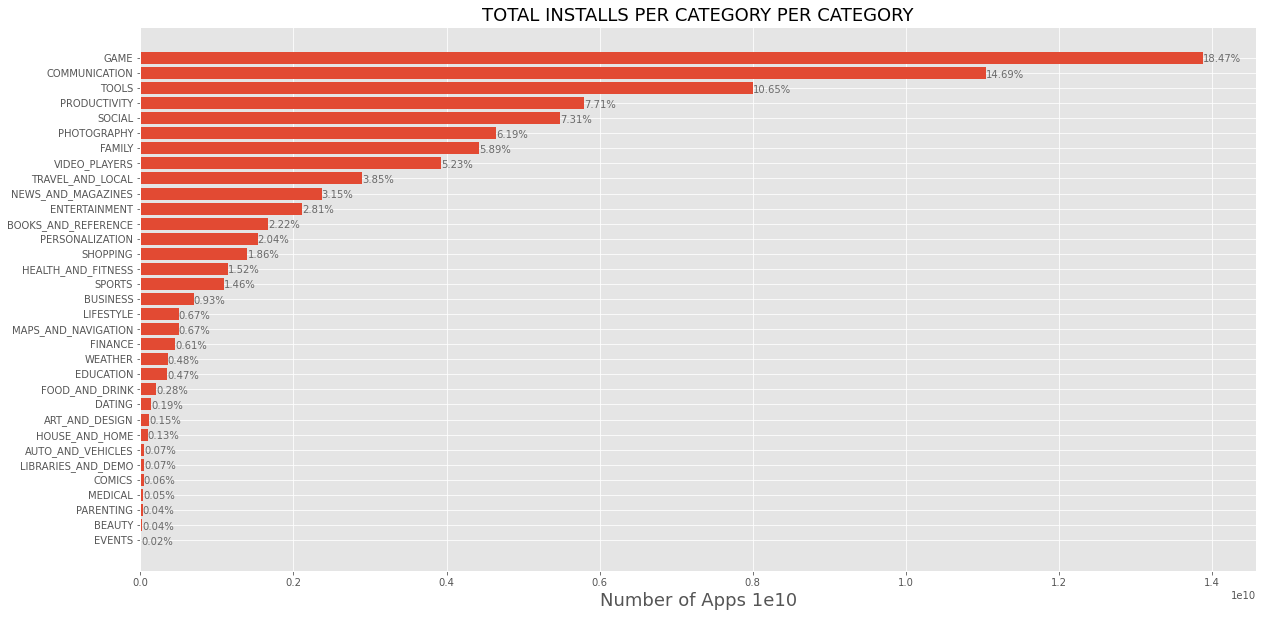

In [35]:
installs_number_list = []

for category in categories_list:
    df_temp = df[(df['Category'] == category)]
    installs_number_list.append(df_temp['Installs'].sum())

keys,values = keys_values_lists_descending(categories_list,installs_number_list)

fig,ax = plt.subplots(figsize=(20,10))
ax.set_title("TOTAL INSTALLS PER CATEGORY PER CATEGORY", fontsize=18)
ax.set_xlabel("Number of Apps 1e10", fontsize=18);
ax.barh(keys,values)

# set individual bar lables using above list
index = 0
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.1, str(round((values[index]/total_installs)*100,2))+'%', fontsize=10,color='dimgrey')
    index = index + 1
plt.show

> However, almost <b>40%</b> of installs is spread among GAME,COMMUNICATION and TOOLS meaning that FAMILY has lower <i>installs per application ratio</i>

## TOTAL PRICES PER CATEGORY

<function matplotlib.pyplot.show(close=None, block=None)>

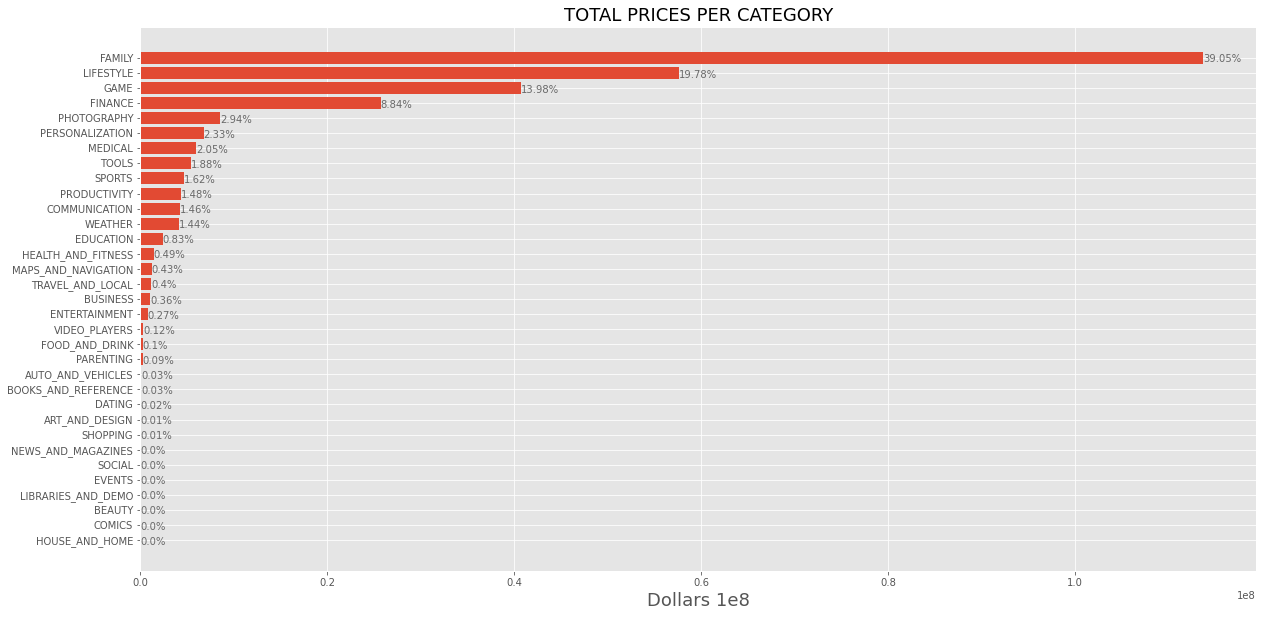

In [36]:
money_category_list = []

for category in categories_list:
    df_temp = df[(df['Category'] == category)]
    money_category_list.append(df_temp['Price*Installs'].sum())

keys,values = keys_values_lists_descending(categories_list,money_category_list)
# print(keys)
# print(values)

fig,ax = plt.subplots(figsize=(20,10))
ax.set_title("TOTAL PRICES PER CATEGORY", fontsize=18)
ax.set_xlabel("Dollars 1e8", fontsize=18);
ax.barh(keys,values)

# set individual bar lables using above list
index = 0
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.1, str(round((values[index]/total_money_spent)*100,2))+'%', fontsize=10,color='dimgrey')
    index = index + 1
plt.show

> The reason for FAMILY having lower <i>installs per application ratio</i> may be the higher prices.<br>
> Almost <b>40%</b> percent of all market prices is located in FAMILY CATEGORY

<function matplotlib.pyplot.show(close=None, block=None)>

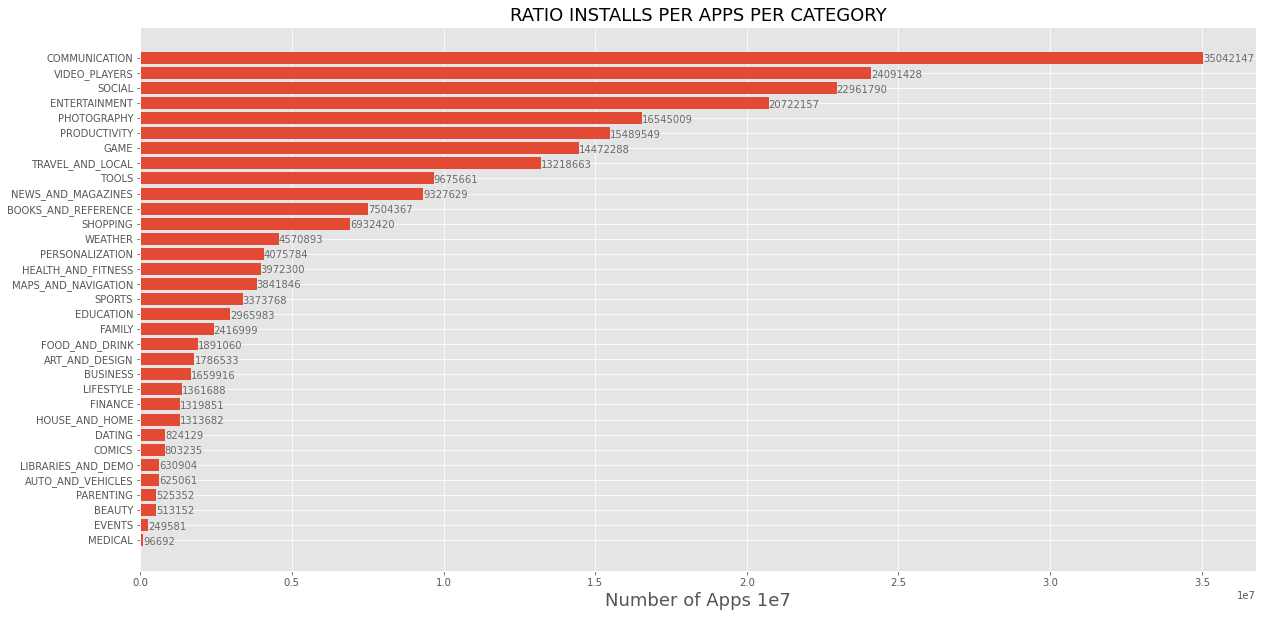

In [37]:
ratio_list = []

for category in categories_list:
    df_temp = df[(df['Category'] == category)]
    total_apps_in_category = len(df_temp['App'].index)
    total_installs_in_category = df_temp['Installs'].sum()
    ratio_installs_per_app_in_category = total_installs_in_category/total_apps_in_category
    ratio_list.append(ratio_installs_per_app_in_category)

keys,values = keys_values_lists_descending(categories_list,ratio_list)

fig,ax = plt.subplots(figsize=(20,10))
ax.set_title("RATIO INSTALLS PER APPS PER CATEGORY", fontsize=18)
ax.set_xlabel("Number of Apps 1e7", fontsize=18);
ax.barh(keys,values)

# set individual bar lables using above list
index = 0
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.1, str(round((values[index]))), fontsize=10,color='dimgrey')
    index = index + 1

plt.show


> It is interesting to see that FAMILY,GAME and TOOLS being <b>the most number of apps categories</b> are not even top 5 due to ratio of installs per apps per category <br>
> It is worth noticing that COMMUNICATION category probably has <b>the highest competition due to top ratio of installs per apps

## TOP 5 INSTALLS  PER APP FOR EACH CATEGORY

> It is import to recognize the leaders in each category and learn from their success
> For this reaseon, the most installed apps in each category is demonstrated below

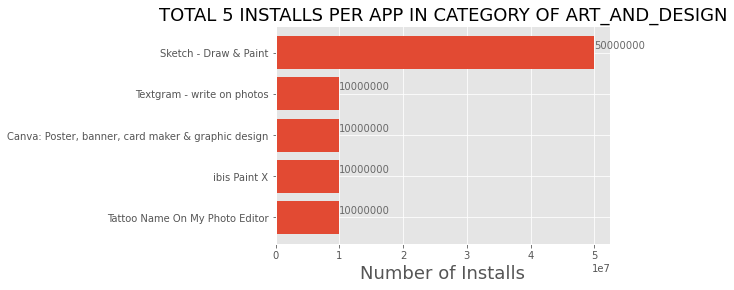

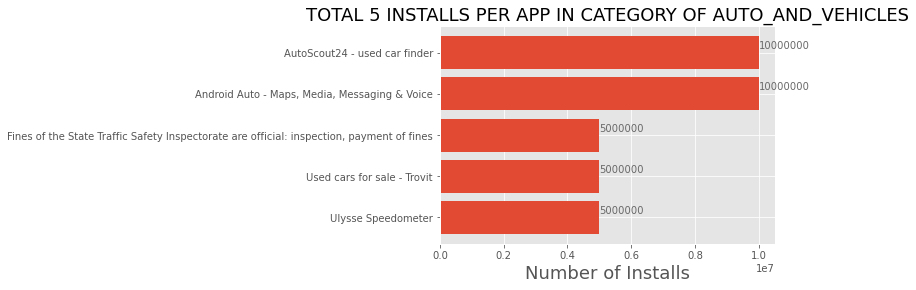

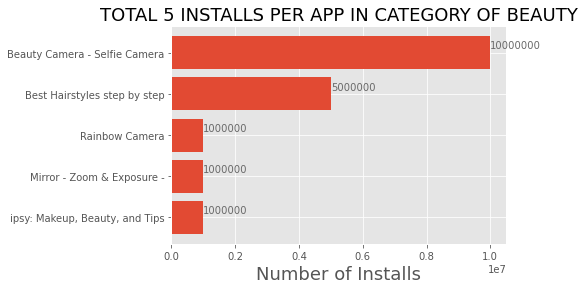

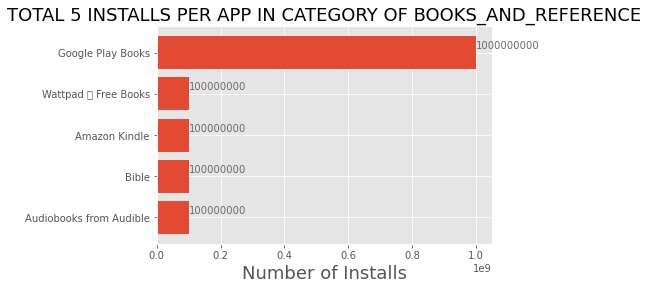

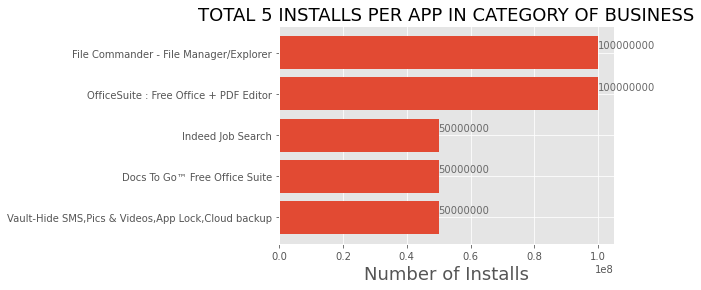

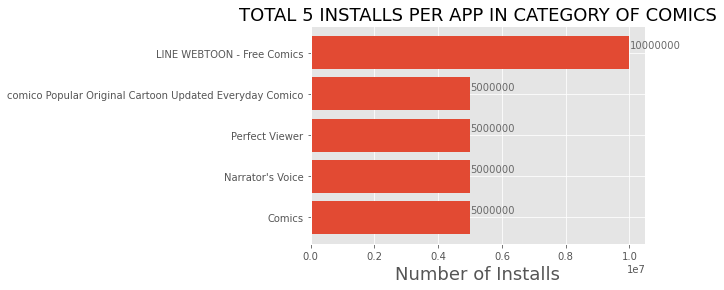

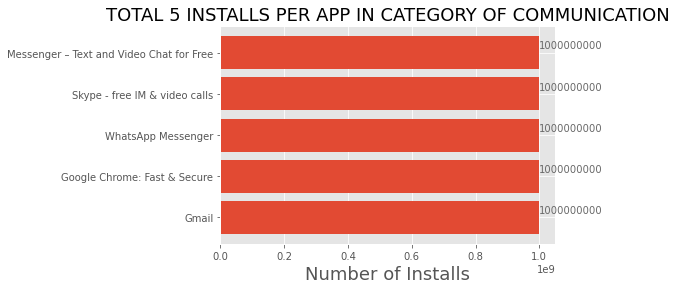

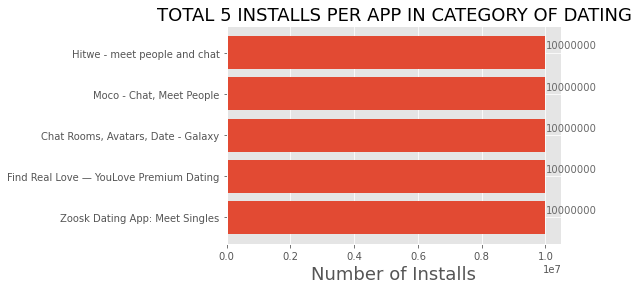

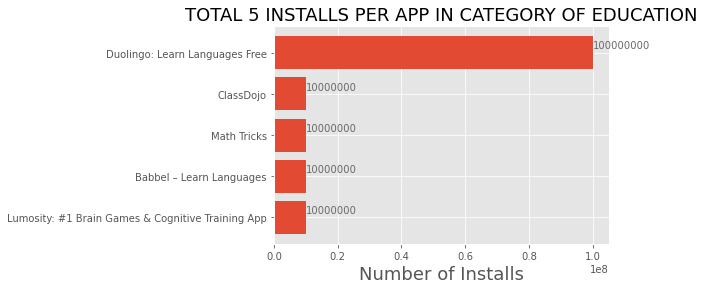

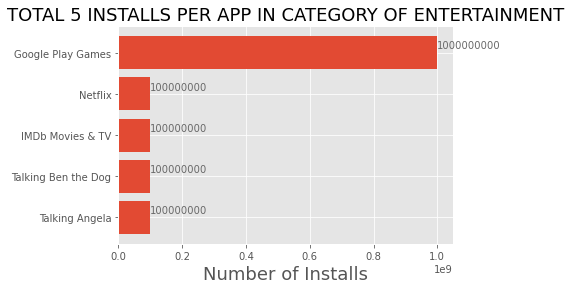

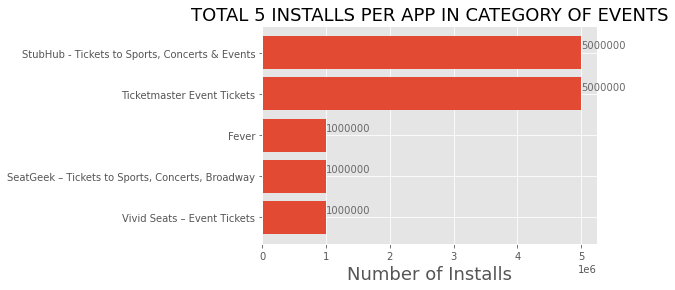

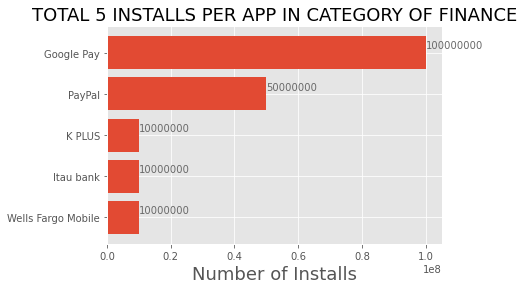

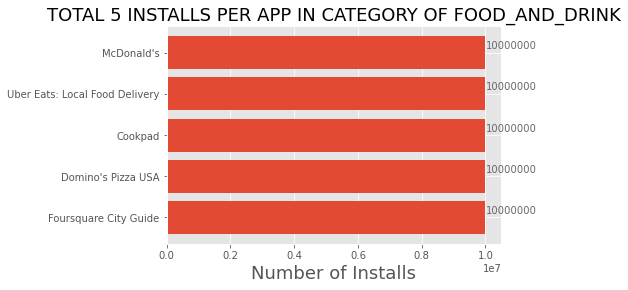

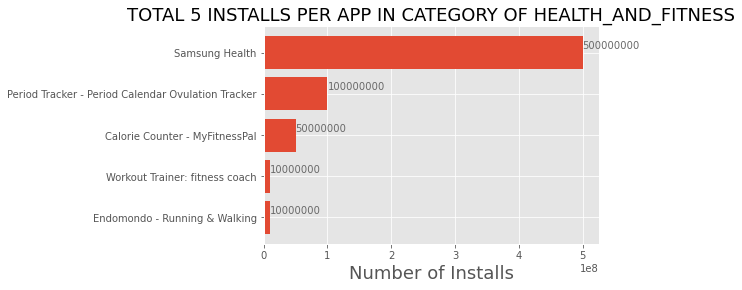

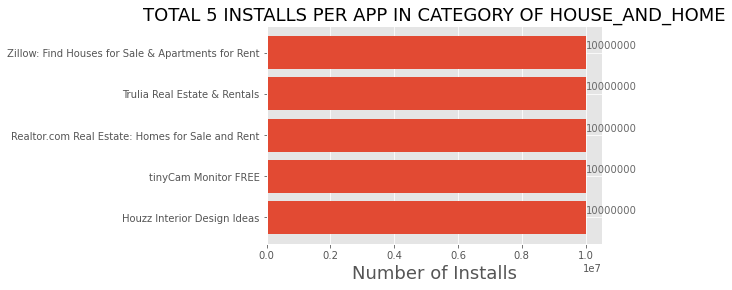

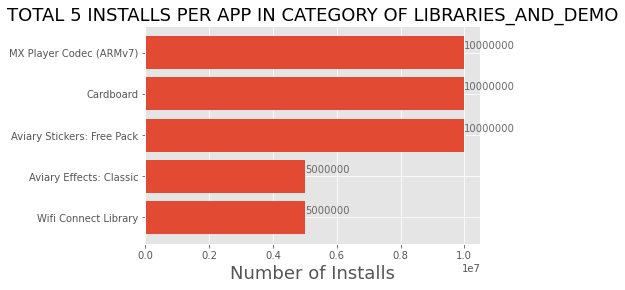

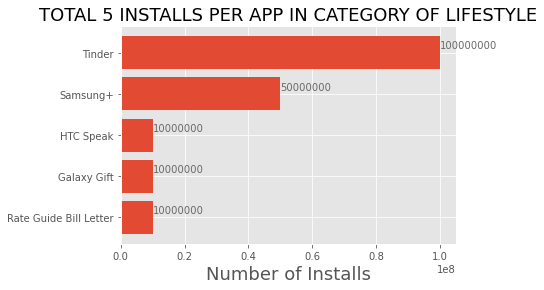

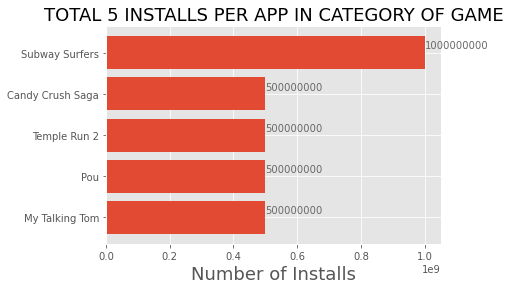

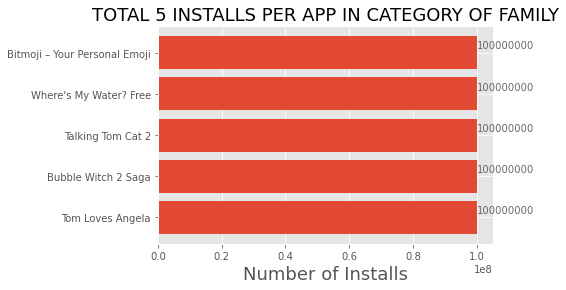

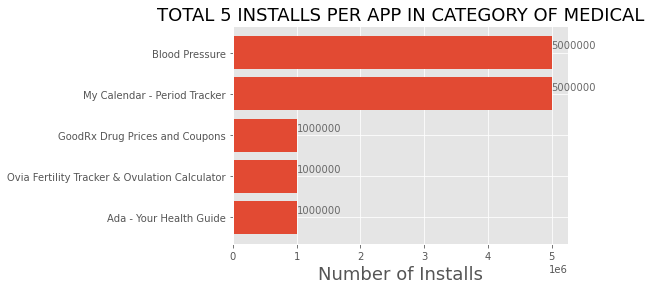

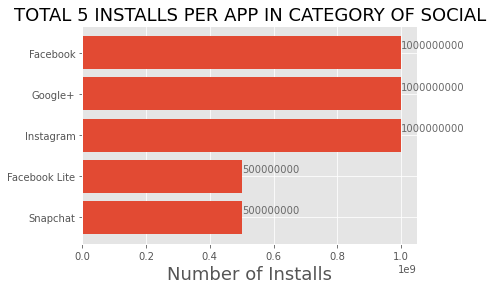

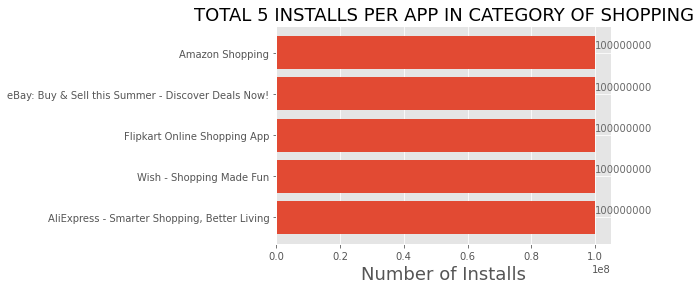

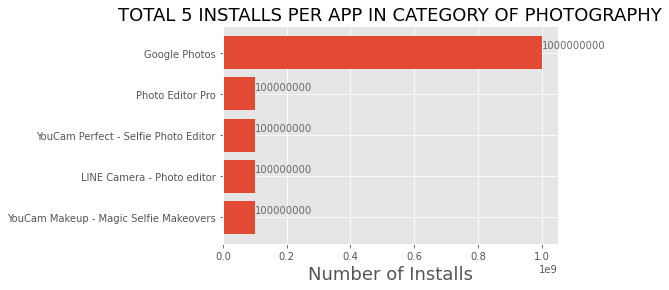

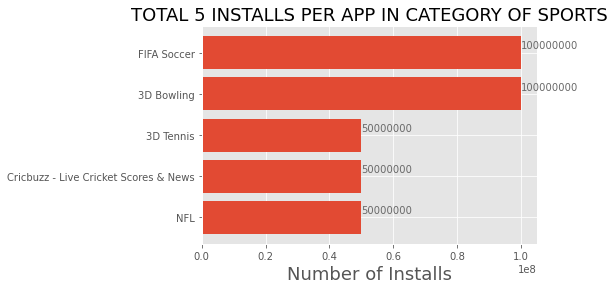

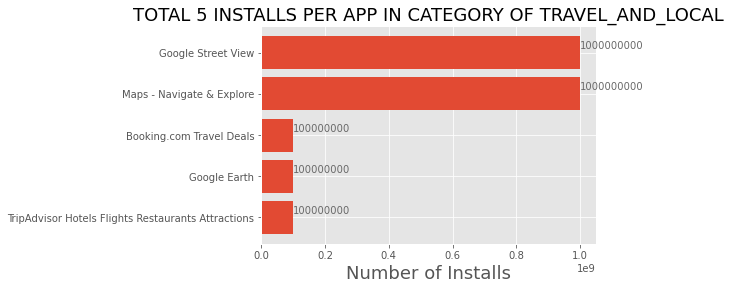

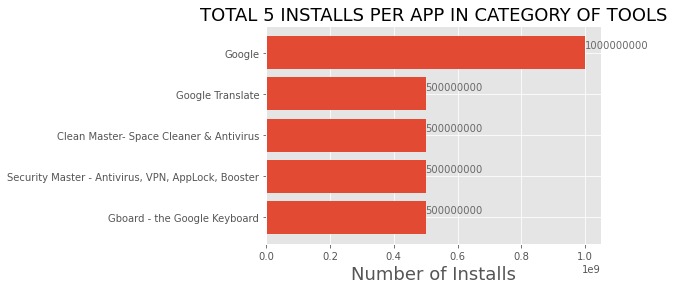

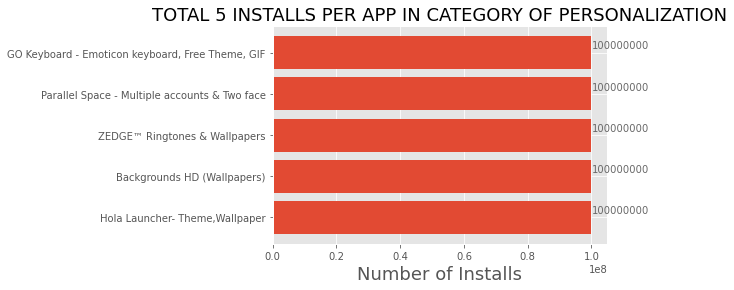

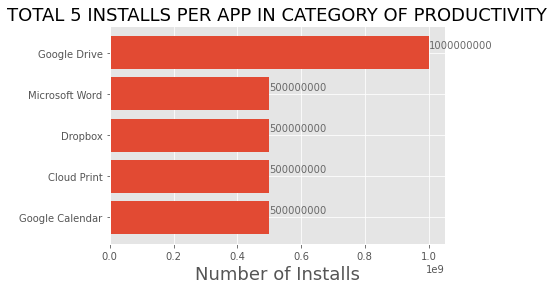

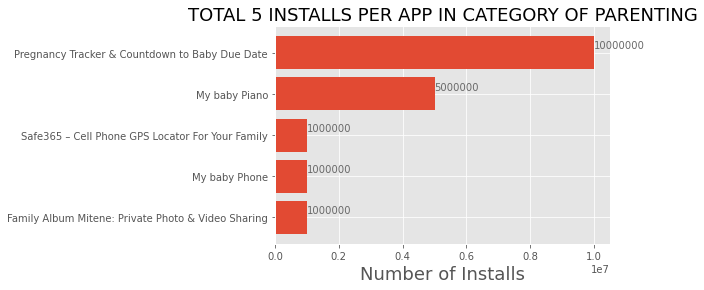

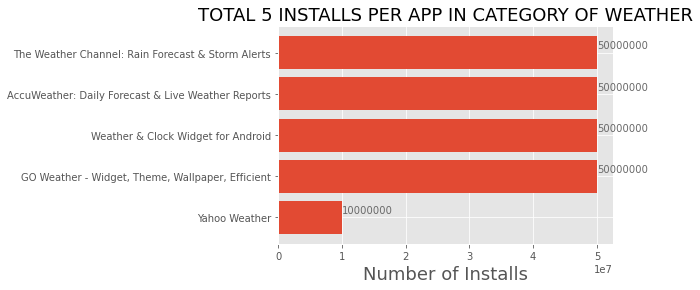

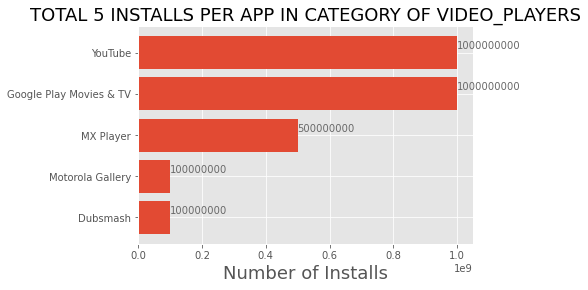

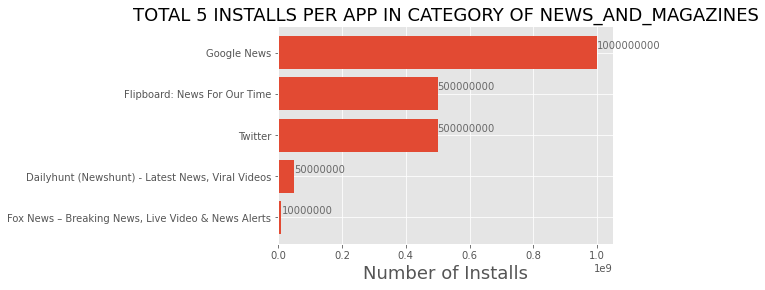

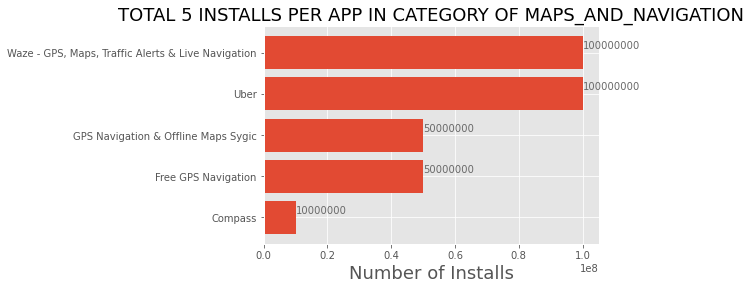

In [39]:
for category in categories_list:
    installs_number_list = []
    df_temp = df[(df['Category'] == category)]
    df_temp = df_temp.sort_values('Installs', axis = 0, ascending = False)
    keys = df_temp['App'][:5].tolist()
    values = df_temp['Installs'][:5].tolist()
    keys.reverse()
    values.reverse()
#     print(keys)
#     print(values)

    fig,ax = plt.subplots()
    ax.set_title("TOTAL 5 INSTALLS PER APP IN CATEGORY OF {0}".format(category),fontsize=18)
    ax.set_xlabel("Number of Installs", fontsize=18);
    ax.barh(keys,values)
    
#     set individual bar lables using above list
    index = 0
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.3, i.get_y()+.5, str(round((values[index]))), fontsize=10,color='dimgrey')
        index = index + 1
        
    plt.show(block=False)
